In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
data = pd.read_csv('Data.csv')
print(data.tail())




    Tahun   export
56   2017  44274.3
57   2018  46810.9
58   2019  44401.9
59   2020  47715.3
60   2021  55688.5


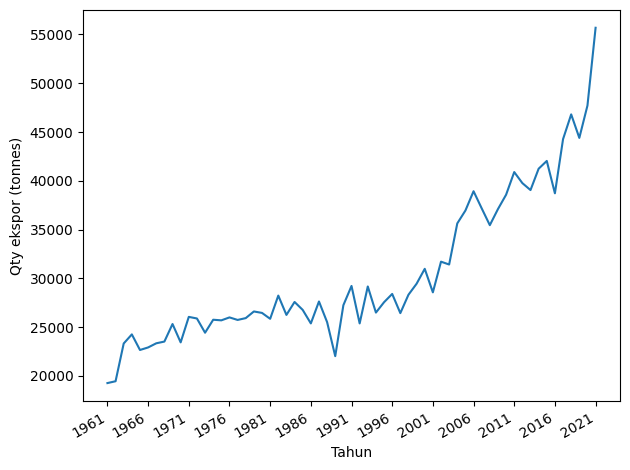

In [4]:
#hasil ((2026-1961)/5 harus sama dengan ((65-0)/5)), agar grafik dapat ditampilkan. nilai bisa diatur u menyesuaikan garis 


fig, ax = plt.subplots()

ax.plot(data['export'])
ax.set_xlabel('Tahun')
ax.set_ylabel('Qty ekspor (tonnes)')

plt.xticks(np.arange(0, 65, 5), np.arange(1961, 2026, 5))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('time series plot.png', dpi=300)

In [5]:
ad_fuller_result = adfuller(data['export'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: 2.621735432742575
p-value: 0.9990788596967285


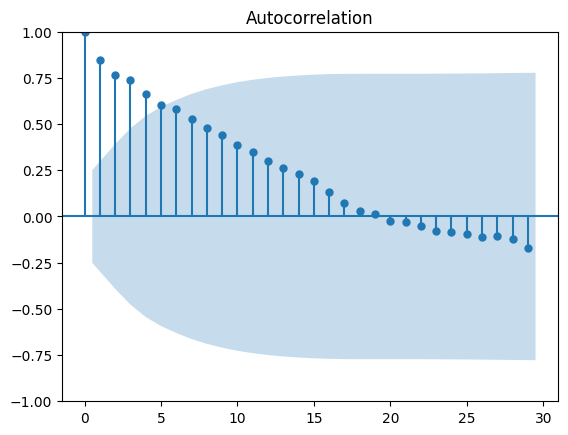

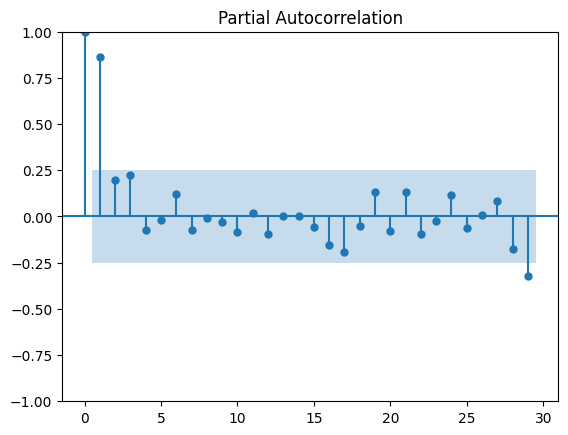

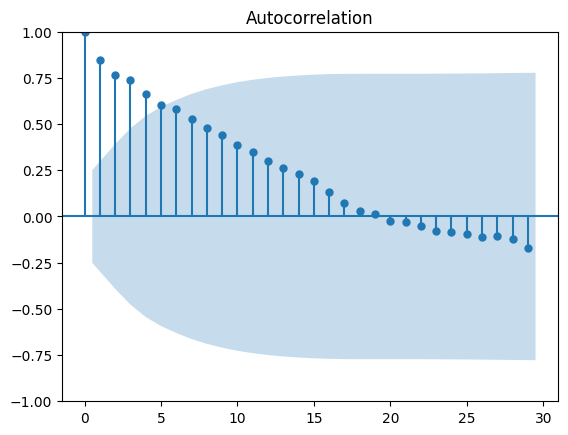

In [6]:
plot_pacf(data['export'],lags=29)
plot_acf(data['export'], lags=29)

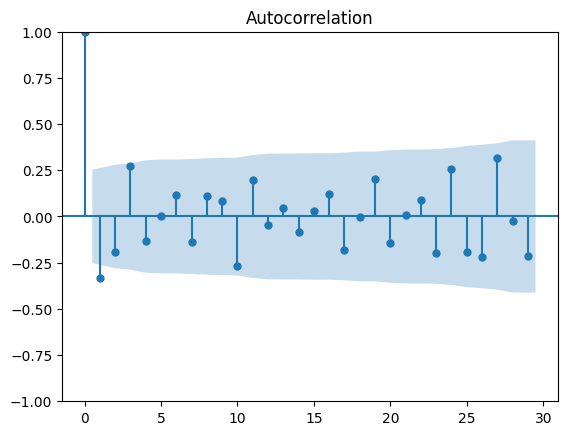

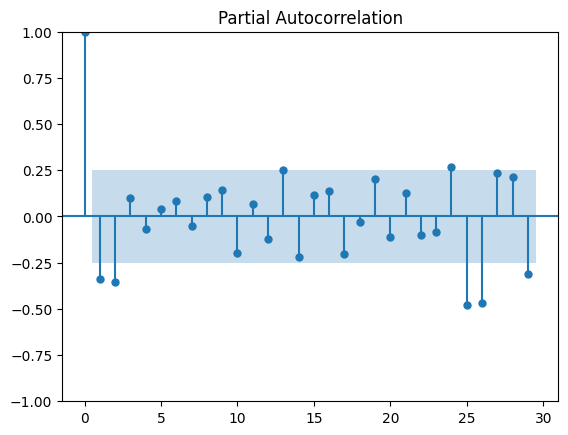

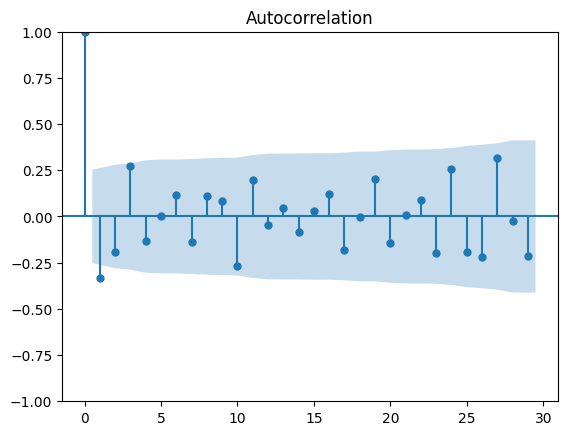

In [7]:
data['export'] = np.log(data['export'])
data['export'] = data['export'].diff()

data = data.drop(data.index[0])

plot_pacf(data['export'], lags=29)
plot_acf(data['export'], lags=29)

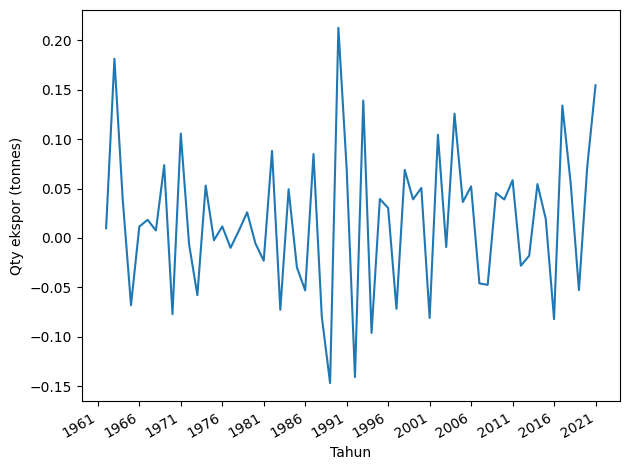

In [9]:
fig, ax = plt.subplots()

ax.plot(data['export'])
ax.set_xlabel('Tahun')
ax.set_ylabel('Qty ekspor (tonnes)')

plt.xticks(np.arange(0, 65, 5), np.arange(1961, 2026, 5))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('time series plot.png', dpi=300)

In [8]:
ad_fuller_result = adfuller(data['export'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -9.265144245595138
p-value: 1.3733743963468493e-15
